In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time

Using TensorFlow backend.
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
# 创建变量
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
# a,b = create_dataset([1,2,3,4,5])
# print(a)
# print(b)

In [4]:
# for i in range(5):
#     print(i)

In [5]:
# # 读取所需数据——————————————————————示例
# df = pd.read_csv('zgpa_train.csv',header=0, parse_dates=[0],index_col=0,usecols=[0, 5], squeeze=True)
# print(df)
# dataset = df.values
# # print(dataset)
# df.head()

In [6]:
# 读取所需数据
df = pd.read_csv('layer9.csv',header=0, parse_dates=[0],index_col=0,usecols=[0, 1], squeeze=True)
print(df)
dataset = df.values
# print(dataset)
df.head()

number
1      17580
2      17968
3      18578
4      18886
5      18850
       ...  
598    35628
599    38190
600    36003
601    36723
602    35475
Name: layer9, Length: 602, dtype: int64


number
1    17580
2    17968
3    18578
4    18886
5    18850
Name: layer9, dtype: int64

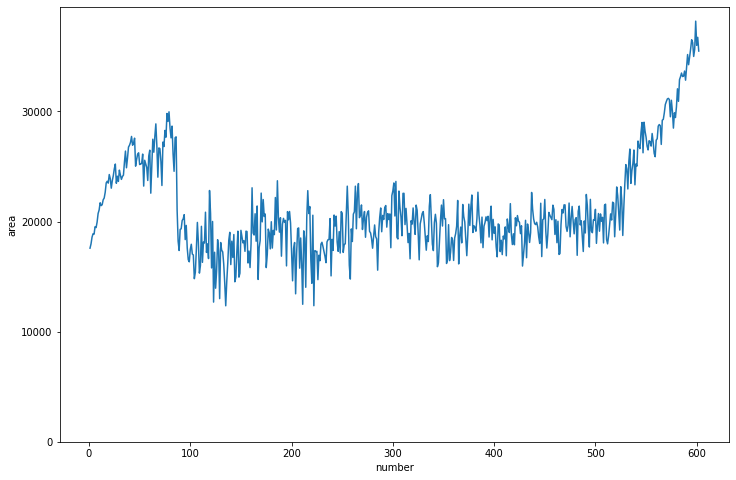

In [7]:
# 画出原数据的时间序列图
plt.figure(figsize=(12, 8))
df.plot()
plt.ylabel('area')
plt.yticks(np.arange(0, 40000, 10000))
plt.savefig('layer_9.jpg')
plt.show()

In [8]:
# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1)) # reshape(-1,1)列数为1，行数根据原数据的个数计算得出
# print(dataset)

In [9]:
# 前80%为训练数据，后20%为测试数据
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

In [10]:
# 生成训练集和测试集的x，y
look_back = 1
trainX, trainY = create_dataset(train, look_back)
# print(trainX, trainY)
testX, testY = create_dataset(test, look_back)
# print(testX, testY)

In [11]:
# 建立模型
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(input_dim=50, output_dim=100,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(input_dim=100, output_dim=200,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(output_dim=1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  after removing the cwd from sys.path.
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 50), units=100)`
  import sys
c:\users\jiang\appdata


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 100)         60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 200)         240800    
_________________________________________________________________
lstm_4 (LSTM)                (None, 300)               601200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
___

c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [12]:
history = model.fit(trainX, trainY, batch_size=64, nb_epoch=50, validation_split=0.1, verbose=1)
print('compilatiom time:', time.time()-start)

c:\users\jiang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 432 samples, validate on 48 samples
Epoch 1/50
432/432 [==============================] - 3s 8ms/step - loss: 0.0753 - val_loss: 0.0172
Epoch 2/50
432/432 [==============================] - 0s 571us/step - loss: 0.0211 - val_loss: 0.0150
Epoch 3/50
432/432 [==============================] - 0s 558us/step - loss: 0.0206 - val_loss: 0.0027
Epoch 4/50
432/432 [==============================] - 0s 530us/step - loss: 0.0175 - val_loss: 0.0042
Epoch 5/50
432/432 [==============================] - 0s 458us/step - loss: 0.0169 - val_loss: 0.0027
Epoch 6/50
432/432 [==============================] - 0s 479us/step - loss: 0.0164 - val_loss: 0.0038
Epoch 7/50
432/432 [==============================] - 0s 426us/step - loss: 0.0163 - val_loss: 0.0027
Epoch 8/50
432/432 [==============================] - 0s 435us/step - loss: 0.0158 - val_loss: 0.0027
Epoch 9/50
432/432 [==========================

In [13]:
# 保存模型
model.save(r"C:\Users\jiang\Documents\Jupyter\model_file_path.h5")

In [14]:
# 预测，利用训练好的模型根据输入计算输出
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Score %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Test Score %.2f RMSE' %(testScore))

Train Score 0.08 RMSE
Test Score 0.07 RMSE


In [16]:
# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
print(trainPredict)

[[18329.041]
 [18592.602]
 [19016.957]
 [19235.967]
 [19210.201]
 [19702.973]
 [19643.994]
 [20011.828]
 [20616.898]
 [20865.244]
 [21395.473]
 [21184.447]
 [21250.162]
 [21616.613]
 [21750.838]
 [22191.531]
 [22940.549]
 [23076.967]
 [22920.887]
 [23631.816]
 [23295.32 ]
 [22516.254]
 [23121.158]
 [23539.29 ]
 [24128.79 ]
 [24533.465]
 [22907.494]
 [23491.348]
 [23063.46 ]
 [24005.48 ]
 [23585.494]
 [23228.006]
 [23466.502]
 [23579.021]
 [24702.154]
 [25711.494]
 [24208.877]
 [25056.736]
 [26087.91 ]
 [26265.414]
 [26552.027]
 [27121.244]
 [26262.25 ]
 [26434.81 ]
 [26952.002]
 [24348.854]
 [24935.545]
 [25425.623]
 [25551.748]
 [24494.66 ]
 [24522.785]
 [24602.525]
 [25432.727]
 [22683.031]
 [24870.285]
 [24542.205]
 [24244.256]
 [23139.225]
 [25256.955]
 [25794.918]
 [22123.014]
 [24375.809]
 [26848.898]
 [25604.863]
 [27121.244]
 [28406.81 ]
 [26190.662]
 [23410.496]
 [26009.594]
 [25944.03 ]
 [24779.654]
 [22730.713]
 [26570.197]
 [26140.273]
 [27730.969]
 [27049.025]
 [29525.27 ]

In [17]:
# 画图
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [18]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[len(trainPredict)+1: len(dataset)-1, :] = testPredict

In [29]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


KeyError: 'acc'

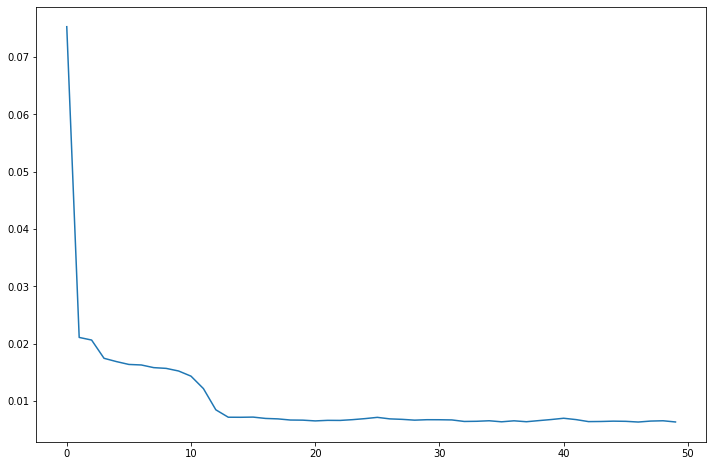

In [22]:
# 模型损失函数
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
# plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('model loss.jpg')
plt.show()

In [ ]:
fig2 = plt.figure(figsize=(20, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('price')
plt.xlabel('date')
plt.savefig('layer_9_predict.jpg')
plt.show()

In [ ]:
fig3 = plt.figure(figsize=(20, 15))
plt.plot(np.arange(train_size+1, len(dataset)+1, 1), scaler.inverse_transform(dataset)[train_size:], label='dataset')
plt.plot(testPredictPlot, 'g', label='test')
plt.ylabel('price')
plt.xlabel('date')
plt.legend()
plt.savefig('layer_9_lastpredicted.jpg')
plt.show()